In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv("books_raw.csv")

            price       rating
count  1000.00000  1000.000000
mean     35.07035     2.923000
std      14.44669     1.434967
min      10.00000     1.000000
25%      22.10750     2.000000
50%      35.98000     3.000000
75%      47.45750     4.000000
max      59.99000     5.000000
rating
1    226
3    203
5    196
2    196
4    179
Name: count, dtype: int64


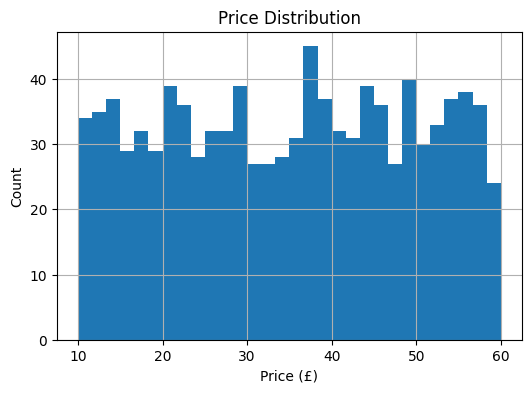

rating
1    34.561195
2    34.810918
3    34.692020
4    36.093296
5    35.374490
Name: price, dtype: float64


In [3]:
# Summary statistics
print(df.describe())
print(df['rating'].value_counts())

# Histogram of prices
plt.figure(figsize=(6,4))
df['price'].hist(bins=30)
plt.title("Price Distribution")
plt.xlabel("Price (£)")
plt.ylabel("Count")
plt.show()

# Mean price by rating
mean_by_rating = df.groupby('rating')['price'].mean()
print(mean_by_rating)


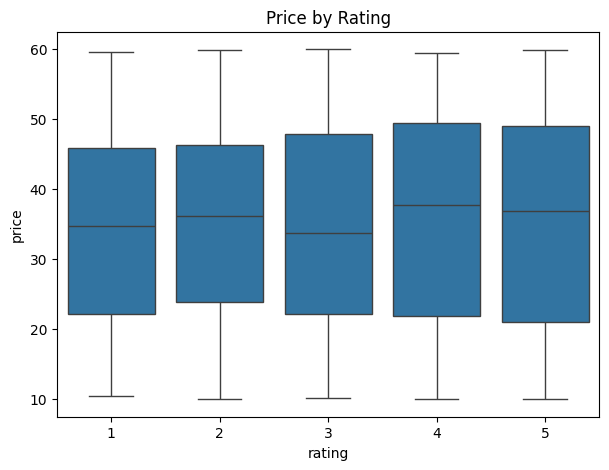

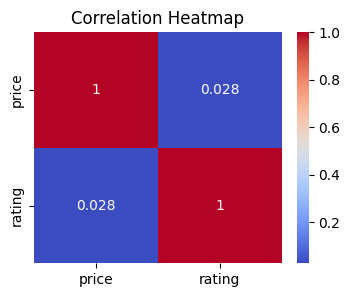

In [4]:
# Boxplot: Price vs Rating
plt.figure(figsize=(7,5))
sns.boxplot(x='rating', y='price', data=df)
plt.title("Price by Rating")
plt.show()

# Correlation heatmap
plt.figure(figsize=(4,3))
sns.heatmap(df[['price','rating']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [5]:
from scipy.stats import spearmanr, ttest_ind

# Hypothesis: higher ratings -> higher price?

# Spearman correlation
corr, pval = spearmanr(df['rating'], df['price'])
print("Spearman correlation:", corr, "p-value:", pval)

# t-test: rating >=4 vs <=3
high = df[df['rating'] >= 4]['price']
low  = df[df['rating'] <= 3]['price']
stat, p = ttest_ind(high, low, equal_var=False)
print("t-test stat:", stat, "p-value:", p)

Spearman correlation: 0.02921568643020118 p-value: 0.3560475336675232
t-test stat: 1.0792569333248379 p-value: 0.2808219421215207


In [6]:
# Save clean dataset and plots
df.to_csv("books_clean.csv", index=False)
print("Saved cleaned dataset with", len(df), "rows.")


Saved cleaned dataset with 1000 rows.


In [7]:
import pandas as pd
df = pd.read_csv('books_raw.csv')

# quick look
print(df.head())
print(df.info())

# standardize availability: keep only number in stock if exists
df['availability'] = df['availability'].str.replace('\n',' ').str.strip()

# drop duplicates
df = df.drop_duplicates(subset=['title'])

# handle missing ratings (if any)
df['rating'] = df['rating'].fillna(0).astype(int)

# create a category column if you scraped it or add easier derived features
# e.g., price bin
df['price_bin'] = pd.cut(df['price'], bins=[0,10,20,30,50,100], labels=['0-10','10-20','20-30','30-50','50+'])

df.to_csv('books_clean.csv', index=False)

                                   title  price availability  rating
0                   A Light in the Attic  51.77     In stock       3
1                     Tipping the Velvet  53.74     In stock       1
2                             Soumission  50.10     In stock       1
3                          Sharp Objects  47.82     In stock       4
4  Sapiens: A Brief History of Humankind  54.23     In stock       5
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1000 non-null   object 
 1   price         1000 non-null   float64
 2   availability  1000 non-null   object 
 3   rating        1000 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 31.4+ KB
None


In [8]:
# IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['price'] < Q1 - 1.5*IQR) | (df['price'] > Q3 + 1.5*IQR)]
print("Outliers found:", len(outliers))

# z-score
import numpy as np
z = np.abs((df['price'] - df['price'].mean()) / df['price'].std())
print("Z-score outliers:", df[z>3].shape[0])


Outliers found: 0
Z-score outliers: 0


In [9]:
from scipy.stats import spearmanr, ttest_ind

# correlation (non-parametric)
corr, pval = spearmanr(df['rating'], df['price'])
print("Spearman corr:", corr, "p:", pval)

# t-test: compare price of rating>=4 vs rating<=3
high = df[df['rating'] >= 4]['price']
low  = df[df['rating'] <= 3]['price']
stat, p = ttest_ind(high, low, equal_var=False)
print("t-test stat:", stat, "p:", p)


Spearman corr: 0.02957169280409913 p: 0.35045589768501917
t-test stat: 1.0869198102124804 p: 0.27742478201936455
